In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [97]:
df=pd.read_csv("/content/LoanApprovalPrediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [98]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [99]:
df.shape

(598, 13)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [101]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


In [102]:
df.drop(["Loan_ID"],inplace=True,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] =le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


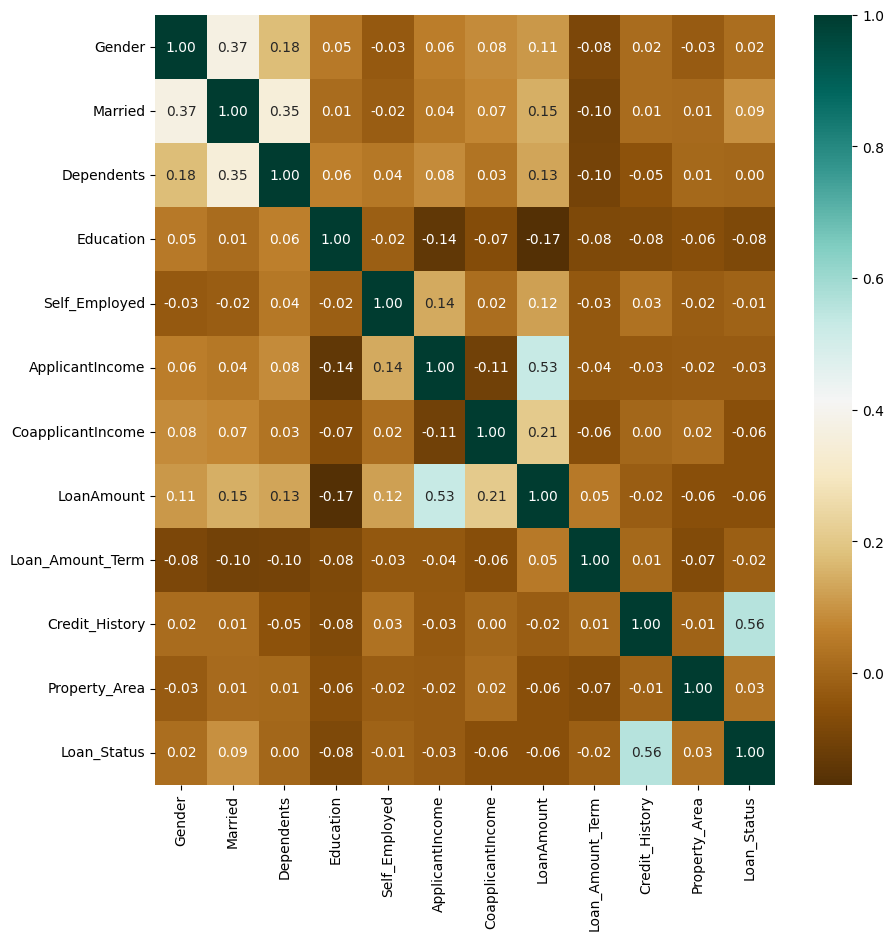

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='BrBG',fmt='.2f')
plt.show()

In [105]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14
Credit_History,49


In [106]:
for col in df.columns:
  df[col].fillna(df[col].mean(),inplace=True)
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [107]:
x=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [109]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((478, 11), (120, 11), (478,), (120,))

Accuracy: 0.8083333333333333


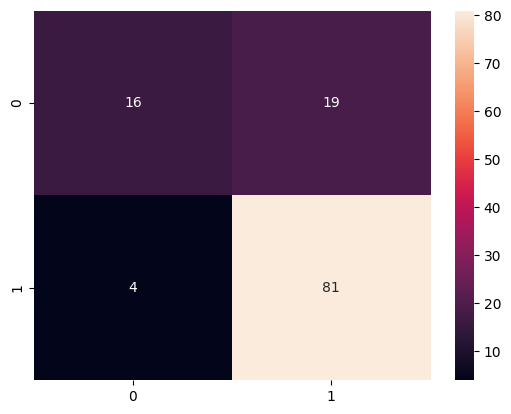

              precision    recall  f1-score   support

           0       0.80      0.46      0.58        35
           1       0.81      0.95      0.88        85

    accuracy                           0.81       120
   macro avg       0.81      0.71      0.73       120
weighted avg       0.81      0.81      0.79       120



In [110]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()
print(classification_report(y_test,y_pred))

Accuracy: 0.825


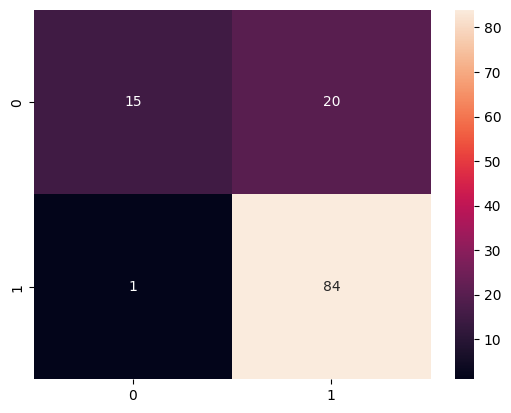

              precision    recall  f1-score   support

           0       0.94      0.43      0.59        35
           1       0.81      0.99      0.89        85

    accuracy                           0.82       120
   macro avg       0.87      0.71      0.74       120
weighted avg       0.85      0.82      0.80       120



In [111]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()
print(classification_report(y_test,y_pred))

Accuracy: 0.7583333333333333


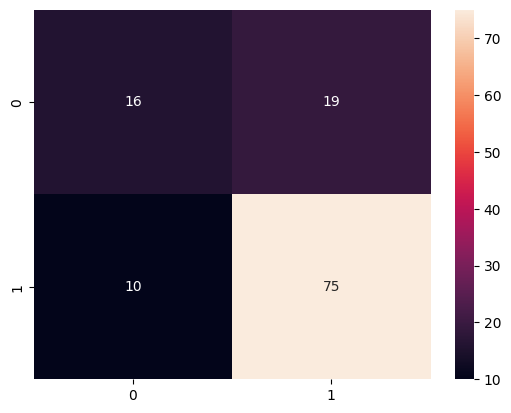

              precision    recall  f1-score   support

           0       0.62      0.46      0.52        35
           1       0.80      0.88      0.84        85

    accuracy                           0.76       120
   macro avg       0.71      0.67      0.68       120
weighted avg       0.74      0.76      0.75       120



In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()
print(classification_report(y_test,y_pred))

Accuracy: 0.8083333333333333


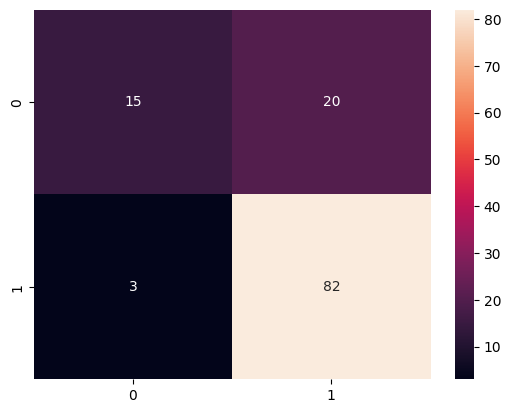

              precision    recall  f1-score   support

           0       0.83      0.43      0.57        35
           1       0.80      0.96      0.88        85

    accuracy                           0.81       120
   macro avg       0.82      0.70      0.72       120
weighted avg       0.81      0.81      0.79       120



In [113]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()
print(classification_report(y_test,y_pred))

Accuracy: 0.7083333333333334


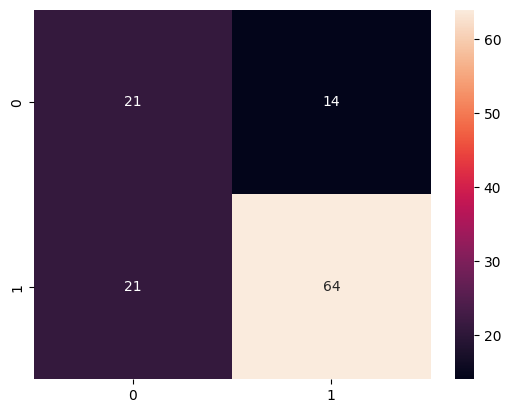

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        35
           1       0.82      0.75      0.79        85

    accuracy                           0.71       120
   macro avg       0.66      0.68      0.67       120
weighted avg       0.73      0.71      0.72       120



In [114]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()
print(classification_report(y_test,y_pred))